## Importing

In [10]:
import numpy as np
import tensorflow as tf
from keras import layers, models, Input
import matplotlib.pyplot as plt

## Dataset Loading

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Reshaping and Normalization

In [12]:
# Reshaping training data
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Normalizing training data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

## Model Formation

In [13]:
data_augmentation = models.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])


model = models.Sequential([
    Input(shape=(28,28,1)),
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Model Compilation

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [15]:
model.fit(x_train, y_train, epochs=17, batch_size=32)

Epoch 1/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.8738 - loss: 0.4001
Epoch 2/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9537 - loss: 0.1506
Epoch 3/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9645 - loss: 0.1149
Epoch 4/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9705 - loss: 0.0984
Epoch 5/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9739 - loss: 0.0824
Epoch 6/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9761 - loss: 0.0779
Epoch 7/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9785 - loss: 0.0714
Epoch 8/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9790 - loss: 0.0679
Epoch 9/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9800 - loss: 0.0652
Epoch 10/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9817 - loss: 0.0603
Epoch 11/17
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9824 - loss: 0.0578
Epoch 12

## Model Evaluation

In [16]:
_, acc = model.evaluate(x_test, y_test)
print(f"The Accuracy of the model is: {round(acc*100,2)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9814 - loss: 0.0680
The Accuracy of the model is: 98.14%


## Model Saving

In [17]:
model.save('model/app.keras')
print('Model Saved Successfully')

Model Saved Successfully


## Model Testing

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
The prediction is: 7


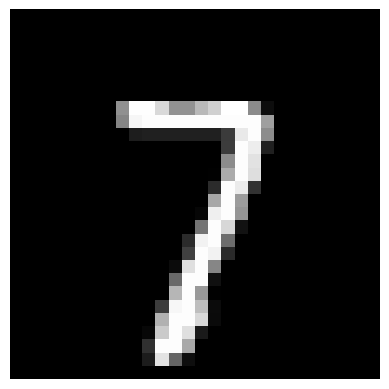

In [18]:
idx = 2301
img = x_test[idx]

image_reshape = np.expand_dims(img, axis=0)

prediction = model.predict(image_reshape)

print(f"The prediction is: {np.argmax(prediction)}")

plt.axis('off')
plt.imshow(img, cmap='gray')